In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import networkx as nx

# Loading the data

In [26]:
pro_network = pd.read_table('9606.protein.links.v11.0.txt', sep=' ')
pro_network.head()

In [27]:
pro_domain = pd.read_table('proteins_w_domains.txt', sep = '\t')
pro_domain.head()

,Pfam ID,Protein stable ID
0,PF00146,ENSP00000354687
1,PF00361,ENSP00000355046
2,PF06444,ENSP00000355046
3,PF00115,ENSP00000354499
4,PF00116,ENSP00000354876


# Filter Network with score >= 500 

In [ ]:
pro_network_m500 = pro_network[pro_network.combined_score >= 500]
pro_network_m500.head()

# Network degree

In [57]:
network = nx.from_pandas_edgelist(pro_network_m500, source = 'protein1', target = 'protein2')
pro_degree = pd.DataFrame(network.degree, columns= ['protein', 'degree'])
pro_degree['Degree'] = np.where(pro_degree['degree'] > 100, 'High', 'Low')
pro_degree['Protein stable ID'] = [ p.replace('9606.','') for p in pro_degree['protein']]
pro_degree.head()

,protein,degree,Degree,Protein stable ID
0,9606.ENSP00000000233,154,High,ENSP00000000233
1,9606.ENSP00000418915,343,High,ENSP00000418915
2,9606.ENSP00000432568,186,High,ENSP00000432568
3,9606.ENSP00000427900,95,Low,ENSP00000427900
4,9606.ENSP00000350199,139,High,ENSP00000350199


# Domain Difference between group

In [58]:
pro_domain_count = pro_domain.groupby('Protein stable ID')['Pfam ID'].agg('count').reset_index(name = "Domain count")
pro_domain_degree = pro_domain_count.merge(pro_degree, on = 'Protein stable ID', how = 'inner')
pro_domain_degree.sort_values(by=['Domain count'], ascending=False).head()

,Protein stable ID,Domain count,protein,degree,Degree
17704,ENSP00000467141,314,9606.ENSP00000467141,174,High
18597,ENSP00000484342,100,9606.ENSP00000484342,80,Low
17415,ENSP00000455507,67,9606.ENSP00000455507,99,Low
18174,ENSP00000479291,64,9606.ENSP00000479291,1,Low
3384,ENSP00000271588,57,9606.ENSP00000271588,12,Low


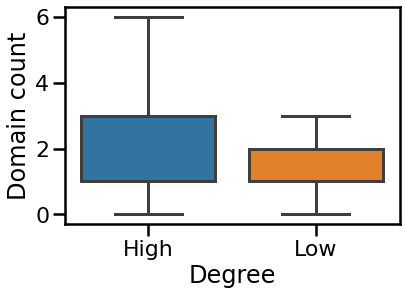

In [63]:
sns.set_context("poster")
sns_plot = sns.boxplot(y="Domain count", x= "Degree", data = pro_domain_degree, showfliers = False)
#sns_plot.set_ylim([0,100])
sns_plot.get_figure().savefig("protein_domains_vs_string_degree.png")